# A MODEL FOR PATTERN TAG PREDICTION 

The task of implementing a pattern tag predictor in an E-Commerce platform has the potential to significantly improve members' user experience and engagement.

**Improve Listing Process**

* `Automated Tagging`: The model can automate the tagging process during the item photo upload. As a seller uploads a photo of their item, the predictor can automatically suggest pattern tags which reduces the manual effort required from sellers. 
Furthermore the tag can be used by the buyer for improved search results allowing the seller to reach a wider audience of potential buyers. 


* `Tag-Based Search`: Pattern tag predictions can be integrated into the search functionality allowing users to filter listings by specific patterns. This would make searches more granular and tailored helping members find exactly what they're looking for more quickly.


* `Search by Photo`: Use the pattern predictor to improve visual search capabilities. Users could upload a photo of clothes with a pattern they like, and the system could find items with similar patterns and characteristics currently available in the marketplace.

---

**Generate Personalized Recommendations**
 
* `Pattern-Based Recommendations`: Incorporate pattern preferences into the members profiles based on their browsing and purchase history. These will be used to create recommendations not just on brand or type of clothing but also on preferred patterns, improving the personalization of the shopping experience


* `Outfit Suggestions`: Offer outfit suggestions based on complementary patterns that pair well with those you view or purchase more often. This can be further integrated into a  `virtual try on` feature that allows members to see how combinations of different suggested patterns would fit them and look on them before their purchase. 


---


**Increase Member Engagement**

* `Fashion Trend Insights`: Provide members with insights and analytics on trending patterns. For instance, generate monthly trend reports on the most searched and purchased patterns or create a `pattern of the week`.





## EDA

The first step of the analysis consists in performing EDA. This concerns analysing the distribution of the features and the label quantitatively and visually to gather insights on what approach to take to solve the problems defined in the previous step

In [ ]:
# import necessary libraries 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential # type: ignore
from tensorflow.keras import regularizers # type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Multiply, Reshape, Conv2D # type: ignore
from tensorflow.keras.applications import MobileNetV2 # type: ignore
from tensorflow.keras.layers import (GlobalAveragePooling2D, Dense, Dropout, Input, Embedding, Flatten, Concatenate # type:ignore

In [ ]:
# Path to folder containing images
images_folder = "path/to/dataset"

# Path to dataframe
dataframe_path = "path/to/images"

df = pd.read_parquet(dataframe_path)
df

,uuid,days_to_sell,gmv_eur,catalog_code_1,catalog_code_2,catalog_code_3,catalog_code_4,catalog_code_5,pattern_tag,filename
0,0,NaN,NaN,WOMEN_ROOT,WOMENS,DRESSES,SUMMER_DRESSES,None,[striped],0.jpeg
1,1,1.0,1.482800,WOMEN_ROOT,WOMENS,DRESSES,CASUAL_DRESSES,None,[floral],1.png
2,2,NaN,NaN,WOMEN_ROOT,WOMENS,TOPS_T_SHIRTS,SHIRTS,None,[solid],2.jpeg
3,3,42.0,2.322476,WOMEN_ROOT,WOMENS,TOPS_T_SHIRTS,BLOUSES,None,[floral],3.png
4,4,1.0,8.000000,MENS,MEN_CLOTHING,MEN_OUTERWEAR_NEW,MEN_JACKETS,MEN_MILITARY_UTILITY_JACKETS,[solid],4.png
...,...,...,...,...,...,...,...,...,...,...
7386,7386,1.0,1.000000,WOMEN_ROOT,WOMENS,TROUSERS,SKINNY_TROUSERS,None,[solid],7386.png
7387,7387,3.0,1.756029,WOMEN_ROOT,WOMENS,DRESSES,SUMMER_DRESSES,None,[floral],7387.png
7388,7388,NaN,NaN,WOMEN_ROOT,WOMENS,TOPS_T_SHIRTS,BLOUSES,None,[],7388.jpeg
7389,7389,NaN,NaN,CHILDREN_NEW,TOYS_AND_GAMES_NEW,STUFFED_ANIMALS_NEW,None,None,[striped],7389.png


In [ ]:
#total null elements per column
df.isnull().sum().reset_index()

,index,0
0,uuid,0
1,days_to_sell,1735
2,gmv_eur,1735
3,catalog_code_1,0
4,catalog_code_2,0
5,catalog_code_3,12
6,catalog_code_4,512
7,catalog_code_5,5518
8,pattern_tag,0
9,filename,0


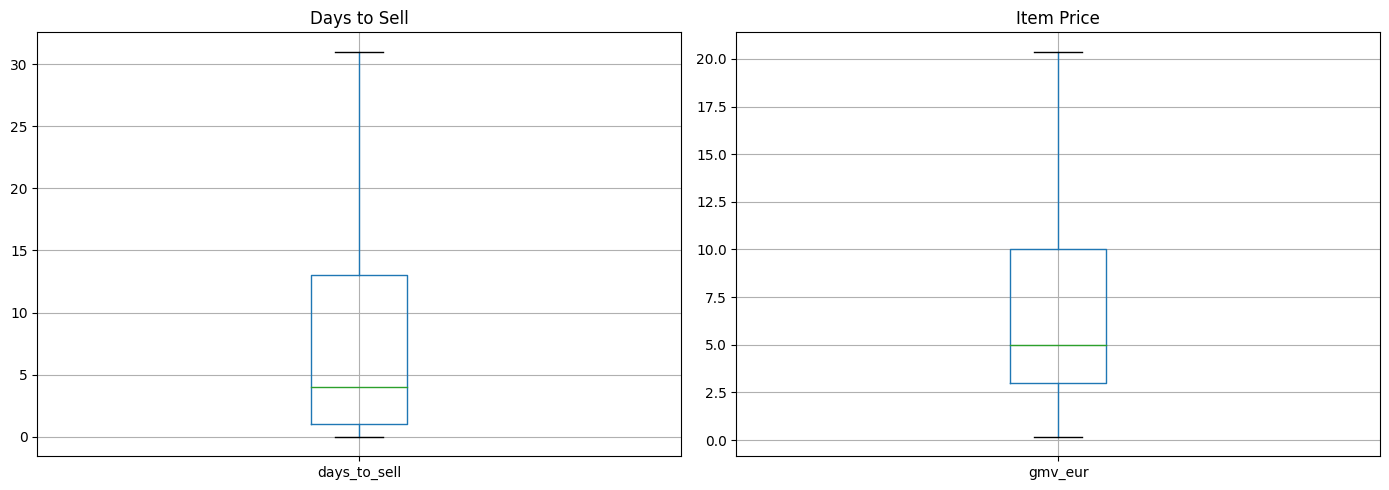

In [ ]:
# plot boxplot of numerical columns
# define plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

df.boxplot(column='days_to_sell', ax=axes[0], showfliers=False)
axes[0].set_title('Days to Sell')

df.boxplot(column = 'gmv_eur', ax = axes[1], showfliers=False)
axes[1].set_title('Item Price')

# show plot
plt.tight_layout()
plt.show()

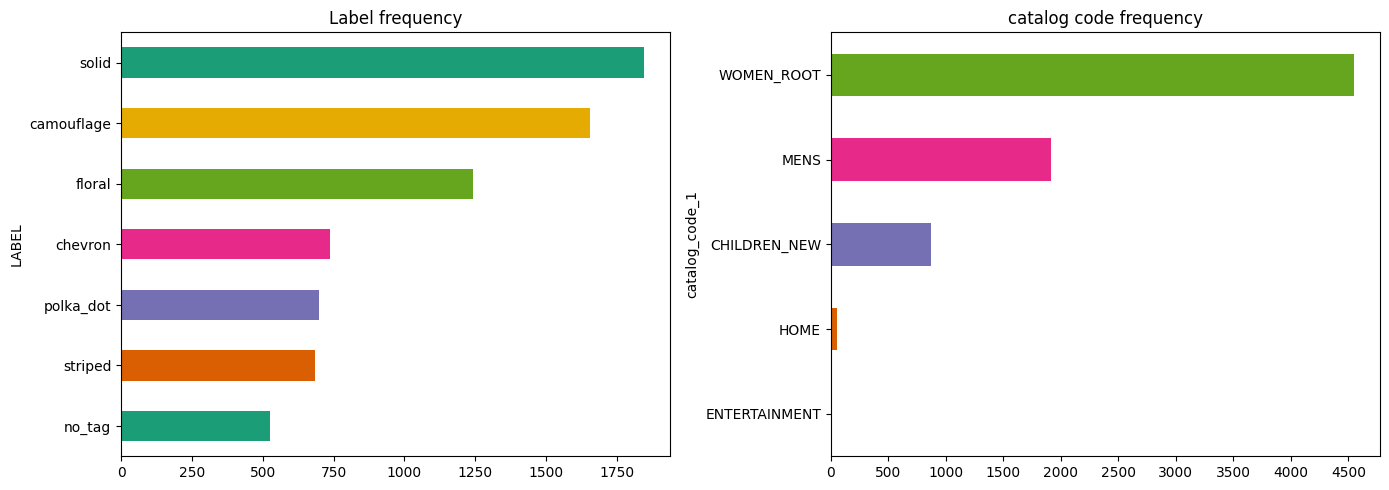

In [ ]:
# plots bar chart of the frequency of the label column and the catalog code 1

# define plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

color = sns.palettes.mpl_palette('Dark2')
df.groupby('LABEL').size().sort_values().plot(kind='barh',ax = axes[0], color=color )
axes[0].set_title('Label frequency')

df.groupby('catalog_code_1').size().sort_values().plot(kind='barh',ax = axes[1],  color=color)
axes[1].set_title('catalog code frequency')

# show plot
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.tight_layout()
plt.show()

In [ ]:
df['catalog_code_2'].value_counts()

WOMENS                           4346
MEN_CLOTHING                     1888
GIRLS_NEW                         428
BOYS_NEW                          405
ACCESSORIES_JEWELLERY             103
FOOTWEAR                           47
BAGS_BACKPACKS                     43
H_TEXTILES                         34
BABY_CARE_NEW                      22
H_ACCESSORIES                      14
MEN_SHOES_NEW                      13
MEN_ACCESSORIES                    10
ALL_OTHER_NEW                       9
COSMETICS_AND_BEAUTY_PRODUCTS       9
H_BOOKS                             5
BOOKS_AND_SCHOOL_NEW                5
TOYS_AND_GAMES_NEW                  3
H_TABLEWARE                         2
BOOKS                               2
MOVING_GEAR_NEW                     1
STROLLERS_NEW                       1
KIDS_FURNITURE_NEW                  1
Name: catalog_code_2, dtype: int64

In [4]:
def get_percentage_diff(df: pd.DataFrame) -> pd.DataFrame:

    """Returns the joined dataframe showing the percentage difference
    by catalog code 2 between original dataframe and dataframe with the photos
    with no tag removed.

    """
    # creates clean label and groups by catalog_code1 and catalog_code_2, this is done to both the original dataframe
    # and the one that doesn't contain the untagged elements
    if not isinstance(df, pd.DataFrame): 
        raise TypeError('Expected Variable to be a pandas dataframe, got {type(df).__name__} instead.')

    df['LABEL'] = df['pattern_tag'].apply(lambda x: x[0] if len(x)>0 else 'no_tag')
    before_removal = df.groupby(by = ['catalog_code_1', 'catalog_code_2'])['LABEL'].count().reset_index()

    df1 = df[df['LABEL'] != 'no_tag']
    after_removal = df1.groupby(by = ['catalog_code_1', 'catalog_code_2'])['LABEL'].count().reset_index()
    after_removal = after_removal.rename(columns = {'LABEL': 'LABEL_AFTER'})

    # merges the two dataframes and computes percentage drop

    difference_df = pd.merge(before_removal, after_removal, how = 'left', on = ['catalog_code_1', 'catalog_code_2'])
    difference_df.fillna(0, inplace = True)
    difference_df['percentage_difference'] = np.round(100*(difference_df['LABEL'] - difference_df['LABEL_AFTER'])/ difference_df['LABEL'], 2)

    return difference_df

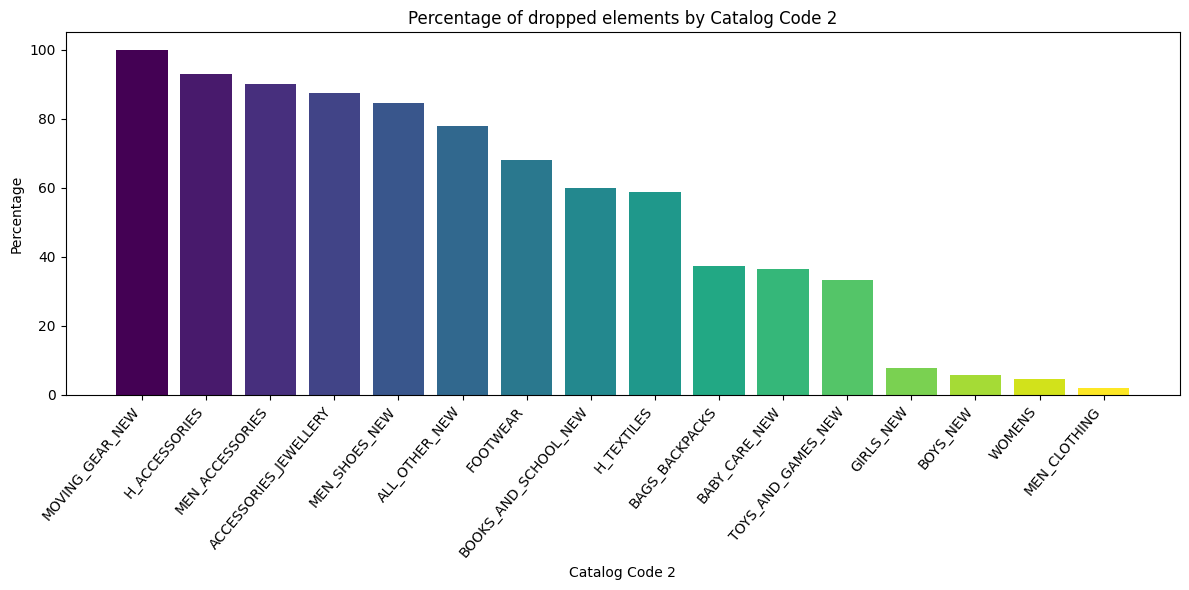

In [ ]:
difference_df = get_percentage_diff(df)
filtered_data = difference_df.drop_duplicates(subset='percentage_difference')
sorted_data = filtered_data.sort_values(by='percentage_difference', ascending=False)

# generate plot showing the percentage drop of images with a certain catalog code 2 after removing those images that have no label
plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_data)-1))

plt.bar(sorted_data['catalog_code_2'], sorted_data['percentage_difference'], color = colors)

plt.xlabel('Catalog Code 2')
plt.ylabel('Percentage')
plt.title('Percentage of dropped elements by Catalog Code 2')
plt.xticks(rotation=50, ha = 'right')

plt.tight_layout()
plt.show()

I define the problem as a 6 class classification task focussed on predicting the tag on clothing items. The tags will be integrated in the product listing process consequently allowing members to filter and search based on the them too. 

## Data Preprocessing


In [5]:
def preprocess_dataframe(df: pd.DataFrame, threshold: int = 30)-> pd.DataFrame:

    """ Performs data cleaning and preprocessing steps
    """
    # creates clean label column and filters data
    df['LABEL'] = df['pattern_tag'].apply(lambda x: x[0] if len(x)>0 else 'no_tag')
    df = df[df['LABEL'] != 'no_tag']

    # extracts least common categories and filters the cleaned dataframes
    total_count = df.groupby(by = ['catalog_code_1', 'catalog_code_2'])['LABEL'].count().reset_index()
    unique_categories = total_count[total_count['LABEL'] > threshold]['catalog_code_2']
    df = df[df['catalog_code_2'].isin(unique_categories)]

    # returns dataframe with filename and label columns
    return df[['filename', 'LABEL']]

In [ ]:
def split_data(df: pd.DataFrame, split_ratio: tuple)-> pd.DataFrame: 

    """Splits dataset according to user's split_ratio
    """
    df = preprocess_dataframe(df)
    
    #performs train_test_split
    X, test_df = train_test_split(df, test_size=split_ratio[-1], random_state=42, stratify = df['LABEL'])
    train_df, val_df = train_test_split(X, test_size = split_ratio[1]/(split_ratio[0] + split_ratio[2]), random_state = 42, stratify = X['LABEL'])

    #returns datasets
    return train_df, val_df, test_df


In [ ]:
def load_data_for_cnn(image_folder: str, df: pd.DataFrame, target_size: tuple = (224, 224),
                      batch_size: int = 32, split_ratio: tuple = (0.6, 0.2, 0.2),
                      augmentation_params: dict = {'rescale': 1./255,
                                                    'rotation_range': 20,
                                                    'width_shift_range': 0.2,
                                                    'height_shift_range': 0.2,
                                                    'shear_range': 0.2, 
                                                    'zoom_range': 0.2,
                                                    'horizontal_flip': True}) -> tuple:

    """Loads images, applies data augmentation (training only), resizes, converts to 3 channels, associates labels,
    splits with stratification and creates data generators for training, validation, and testing.

    Args:
        image_folder (str): Path to the folder containing images.
        df (pd.DataFrame): DataFrame containing image filenames and labels.
        target_size (tuple, optional): The target image size for resizing. Defaults to (224, 224).
        batch_size (int, optional): Batch size for data generators. Defaults to 32.
        split_ratio (tuple, optional): Ratio for splitting data into training, validation, and testing sets. Defaults to (0.6, 0.2, 0.2).
        augmentation_params (dict, optional): Dictionary containing data augmentation parameters. Defaults to basic transformations.

    Returns:
        tuple: A tuple containing three ImageDataGenerator objects with metadata for training,
                evaluation, and testing datasets.

    """
    # returns split data
    train_df, val_df, test_df = split_data(df, split_ratio=split_ratio)

    # Create Data Generators
    train_datagen = ImageDataGenerator(
        **augmentation_params
    )

    val_datagen = ImageDataGenerator(rescale=1./255)

    # Flow images from DataFrame in batches
    train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_df,
        directory=image_folder,
        x_col="filename",
        y_col='LABEL',
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical'
    )

    val_generator = val_datagen.flow_from_dataframe(
        dataframe=val_df,
        directory=image_folder,
        x_col="filename",
        y_col='LABEL',
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical'
    )
    test_datagen = ImageDataGenerator(rescale = 1./255)
    test_generator =  test_datagen.flow_from_dataframe(
        dataframe=test_df,
        directory=image_folder,
        x_col="filename",
        y_col='LABEL',
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle = False

    )

    # Loads Metadata
    train_metadata = train_df['catalog_code_3'].values
    val_metadata = val_df['catalog_code_3'].values
    test_metadata = test_df['catalog_code_3'].values
    
    # returns generators for training validation and testing

    return (train_generator, train_metadata), (val_generator, val_metadata), (test_generator, test_metadata)



In [ ]:
def calculate_weights(labels: pd.Series) -> dict:

    """ Returns a dictionary containing the weights
        of each class to be used during traning
    """
    dictionary = {'camouflage': 0, 'chevron': 1,'floral': 2,'polka_dot': 3,'solid': 4,'striped': 5}
    class_counts = labels.value_counts()
    total_samples = len(labels)
    weights = total_samples / (len(class_counts) * class_counts)
    weights_dict = {dictionary[label]: weights.to_dict()[label] for label in weights.to_dict()}

    return weights_dict

## Model Development

### Model Definition


In [ ]:
def attention_module(feature_map):
    """
    Apply an attention mechanism to feature map.
    
    Arg:
    feature_map: The input tensor containing feature maps from a convolutional layer.
    
    Returns:
    attended map: The feature map reweighted with learned attention weights.
    """
    # Global average pooling to get a vector
    avg = GlobalAveragePooling2D()(feature_map)
    avg = Reshape((1, 1, avg.shape[-1]))(avg)

    # Learnable scaling factors
    attention_weights = Conv2D(filters=feature_map.shape[-1], kernel_size=(1, 1), activation='sigmoid')(avg)

    # Multiply feature map with the attention weights
    attended_map = Multiply()([feature_map, attention_weights])

    return attended_map


In [ ]:
def build_multimodal_model(input_shape: tuple = (224, 224, 3),
                           num_classes: int = 6,
                           dropout_prob: float = 0.5,
                           n_neurons: int = 1024,
                           reg_weight: float = 0.001,
                           metadata_vocab_size: int = 1000,
                           embedding_dim: int = 50) -> Model:

    """Builds a multimodal model combining CNN features with metadata embeddings.
        Imports pretrained MobileNetV2 model with imagenet weigths (base model),
        adds final dense layers for classification task and returns model for training

    Args:
        input_shape (tuple, optional): input size for model. Defaults to (224, 224, 3)
        num_classes (int, optional): number of classification classes. Defaults to 6
        dropout_prob (float, optional): Dropout probability in custom layer. Defaults to 0.5
        n_neurons (int, optional): Number of Neurons in final dense layer. Defaults to 1024
        reg_weight (float, optional): regularization weight for L2 penalty. Defaults to 0.001
        matadata_vocab_size (int, optional): size of vocabulary of embedding layer. Defaults to 1000. 
        embedding_dim: (int, optional): size of final embedding of the metadata. Defaults to 50

    """
    

    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in base_model.layers:
        layer.trainable = False

    cnn_output = base_model.output
    cnn_output = GlobalAveragePooling2D()(cnn_output)

    # Metadata embedding model
    metadata_input = Input(shape=(1,), name="metadata_input")
    metadata_embedding = Embedding(input_dim=metadata_vocab_size,
                                    output_dim=embedding_dim,
                                    input_length=1)(metadata_input)
    metadata_embedding = Flatten()(metadata_embedding)

    # Concatenate CNN and metadata features
    combined = Concatenate()([cnn_output, metadata_embedding])

    # Add dense layers for classification
    x = Dense(n_neurons, activation='relu', kernel_regularizer=regularizers.l2(reg_weight))(combined)
    x = Dropout(dropout_prob)(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    # Build the model
    model = Model(inputs=[base_model.input, metadata_input], outputs=predictions)

    return model

### Model Training

In [ ]:
# generate training, validation and testing data, calculate class weight and builds model

n_epochs = 10
(train_generator, train_meta), (val_generator, val_meta), (test_generator, test_meta) = load_data_for_cnn(images_folder, df)
class_weights = calculate_weights(preprocess_dataframe(df)['LABEL'])
model = build_multimodal_model()

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'f1_score'])

# Train the model

model.fit(
    [train_generator, train_meta],
    validation_data=([val_generator, val_meta]),
    epochs=n_epochs,
    class_weights = class_weights

)

# Save the model
model.save('model.keras')

Epoch 1/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 46s 334ms/step - accuracy: 0.6901 - f1_score: 0.6375 - loss: 2.0412 - val_accuracy: 0.8391 - val_f1_score: 0.8026 - val_loss: 1.1852
Epoch 2/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 46s 347ms/step - accuracy: 0.8557 - f1_score: 0.8278 - loss: 1.1056 - val_accuracy: 0.8672 - val_f1_score: 0.8414 - val_loss: 0.9455
Epoch 3/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 47s 358ms/step - accuracy: 0.8799 - f1_score: 0.8588 - loss: 0.8560 - val_accuracy: 0.8768 - val_f1_score: 0.8475 - val_loss: 0.7909
Epoch 4/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 45s 336ms/step - accuracy: 0.8855 - f1_score: 0.8627 - loss: 0.7178 - val_accuracy: 0.8745 - val_f1_score: 0.8486 - val_loss: 0.7299
Epoch 5/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 44s 333ms/step - accuracy: 0.8888 - f1_score: 0.8658 - loss: 0.6492 - val_accuracy: 0.8708 - val_f1_score: 0.8487 - val_loss: 0.6944
Epoch 6/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 44s 335ms/step - accuracy: 0.8910 - f1_score: 0.8723 - loss: 0.5876 - val_accuracy: 0.8605 - va

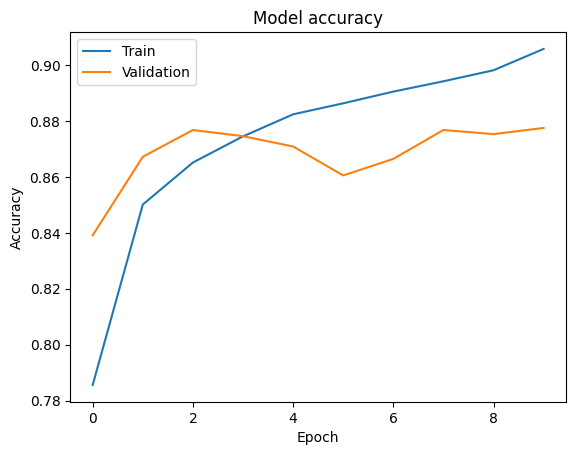

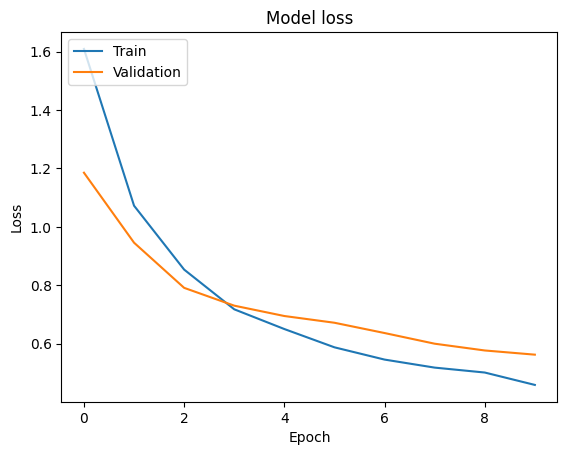

In [ ]:
# Plot training & validation accuracies
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Testing


In [ ]:
# retrieve true labels
true_labels = test_generator.labels

# Make predictions on the test set
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=-1)

print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       331
           1       0.88      0.69      0.77       137
           2       0.83      0.91      0.87       246
           3       0.90      0.82      0.85       137
           4       0.90      0.95      0.93       370
           5       0.82      0.92      0.87       134

    accuracy                           0.89      1355
   macro avg       0.88      0.87      0.87      1355
weighted avg       0.89      0.89      0.89      1355



In [ ]:
dictionary = {'camouflage': 0, 'chevron': 1,'floral': 2,'polka_dot': 3,'solid': 4,'striped': 5}

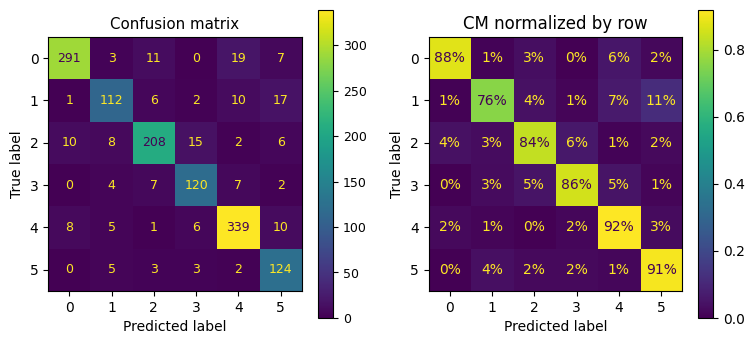

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

ConfusionMatrixDisplay.from_predictions(true_labels, predicted_labels, ax=axs[0])
axs[0].set_title("Confusion matrix")

ConfusionMatrixDisplay.from_predictions(true_labels, predicted_labels, ax=axs[1],
                                        normalize="true", values_format=".0%")
axs[1].set_title("CM normalized by row")

plt.show()

## How to test the effectiveness of our deployed model?


**Qualitative Approach**
* `Conduct Surveys and Collect Feedback`: We can collect user feedback via surveys or feedback forms specifically asking about their experiences with features like search filters involving tags, tags accuracy, and overall satisfaction with the tag-related features.



* `Seller Feedback`: Since sellers directly interact with the upload and tagging process we should gather their feedback on the automated tagging feature understanding their satisfaction with the accuracy of the tag suggestions and the impact on their listing experience.
---
**Quantitative Approach**



**A/B Testing**: 

1. `Hypothesis`: Integrating the pattern tag in the search engine will increase conversion rates by making it easier for buyers to find products they are interested in and allowing at the same time sellers to increase their reach.

2. `Define Metrics`: 
    - **Conversion Rate**: The percentage of visitors who make a purchase. An increase would indicate that the feature helps users find products they like more efficiently leading to higher purchasing rates


3. `Following steps`: Randomization, define significance levels test duration and so on, collection of the data and analysis of results via means of statistical testing. 




**Thanks for your attention!**